In [476]:
import itertools
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.utils.data as data_utils 
from torch.autograd import Variable

from torchvision import transforms

import numpy as np
import pandas as pd

%matplotlib inline

In [477]:
df_label = pd.read_csv('./Platin_Data/patient.csv', sep = '\t', index_col = 0)

In [478]:
df_label

,PLATINUM_STATUS
ID,
TCGA-61-1910,Sensitive
TCGA-24-0982,Resistant
TCGA-36-1580,Resistant
TCGA-25-1321,Sensitive
TCGA-30-1892,Resistant
...,...
TCGA-04-1347,Sensitive
TCGA-24-0968,Sensitive
TCGA-30-1891,Resistant


In [479]:
df_label.loc[df_label['PLATINUM_STATUS'] == 'Sensitive', 'label'] = 1
df_label.loc[df_label['PLATINUM_STATUS'] == 'Resistant', 'label'] = 0

In [480]:
df_label

,PLATINUM_STATUS,label
ID,,
TCGA-61-1910,Sensitive,1.0
TCGA-24-0982,Resistant,0.0
TCGA-36-1580,Resistant,0.0
TCGA-25-1321,Sensitive,1.0
TCGA-30-1892,Resistant,0.0
...,...,...
TCGA-04-1347,Sensitive,1.0
TCGA-24-0968,Sensitive,1.0
TCGA-30-1891,Resistant,0.0


In [481]:
df_data = pd.read_csv('./Platin_Data/final_.csv', sep = '\t', index_col = 0)

In [482]:
df_data

,TCGA-61-1910,TCGA-24-0982,TCGA-36-1580,TCGA-25-1321,TCGA-30-1892,TCGA-61-1741,TCGA-13-0727,TCGA-04-1542,TCGA-61-1918,TCGA-25-1316,...,TCGA-04-1530,TCGA-13-0897,TCGA-09-1666,TCGA-25-2398,TCGA-20-1682,TCGA-04-1347,TCGA-24-0968,TCGA-30-1891,TCGA-09-0366,TCGA-13-0884
ID,,,,,,,,,,,,,,,,,,,,,
ENSG00000015413,0.563384,0.172614,0.389207,0.072607,0.279721,0.433772,0.281011,0.067890,0.374432,0.216215,...,0.077356,0.028849,0.069302,0.156669,0.129739,0.076829,0.209148,0.178666,0.554952,0.063784
ENSG00000048545,0.007666,0.007190,0.027081,0.002315,0.057091,0.189098,0.035355,0.004330,0.004660,0.000000,...,0.125378,0.080959,0.014889,0.325469,0.024518,0.000000,0.013682,0.034186,0.032361,0.018597
ENSG00000069482,0.970585,0.395276,1.403594,0.308600,0.206074,0.615742,0.274869,0.678094,0.993677,1.225295,...,0.077361,0.846036,1.240228,1.940583,0.196062,0.319288,0.237050,0.772034,0.195435,0.784894
ENSG00000072657,0.003561,0.005010,0.008641,0.003129,0.133216,0.027408,0.000332,0.001463,0.001771,0.002958,...,0.105511,0.000000,0.000943,0.041478,0.001035,0.000491,0.009708,0.000481,0.000085,0.000393
ENSG00000078399,0.044476,0.090384,0.133845,0.004478,0.119614,0.058182,3.190913,0.000000,0.090121,39.109981,...,0.089808,0.135224,0.064789,1.004923,0.578497,0.033696,0.185222,0.110194,1.631170,0.035967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000278698,0.000000,0.270091,0.000000,0.521892,0.000000,0.322889,0.000000,0.000000,0.175048,15.130122,...,0.000000,0.000000,0.000000,0.000000,2.394687,0.000000,0.205584,0.000000,0.000000,0.000000
ENSG00000279834,0.894232,0.034947,0.000000,0.157563,0.000000,0.167113,0.038188,0.000000,0.407687,0.000000,...,0.270847,0.000000,0.036184,0.000000,0.238342,0.000000,0.000000,0.000000,0.058985,0.060262
ENSG00000279970,1.612154,0.311310,0.707253,2.033770,0.294278,0.584831,0.145792,0.589240,1.210576,0.259962,...,0.172338,0.091049,0.506526,0.070638,4.428358,0.071847,0.710875,0.000000,2.477118,0.191723


In [483]:
df_data_mod = df_data.T

In [484]:
df_data_mod

ID,ENSG00000015413,ENSG00000048545,ENSG00000069482,ENSG00000072657,ENSG00000078399,ENSG00000080572,ENSG00000100678,ENSG00000104435,ENSG00000104888,ENSG00000105146,...,ENSG00000274576,ENSG00000275756,ENSG00000276775,ENSG00000277247,ENSG00000278196,ENSG00000278698,ENSG00000279834,ENSG00000279970,ENSG00000280411,ENSG00000281880
TCGA-61-1910,0.563384,0.007666,0.970585,0.003561,0.044476,0.000000,0.000000,0.000000,0.043732,2.308592,...,0.000000,0.920597,0.000000,1.604301,0.299376,0.000000,0.894232,1.612154,0.761720,0.000000
TCGA-24-0982,0.172614,0.007190,0.395276,0.005010,0.090384,0.007062,0.000000,0.006438,0.082034,0.242661,...,24.797152,0.259035,4.625172,0.188089,4.211878,0.270091,0.034947,0.311310,0.357217,0.000000
TCGA-36-1580,0.389207,0.027081,1.403594,0.008641,0.133845,0.001970,0.002559,0.041762,0.074384,0.984290,...,4.017149,0.289083,0.893372,0.314861,4.817979,0.000000,0.000000,0.707253,15.996040,0.000000
TCGA-25-1321,0.072607,0.002315,0.308600,0.003129,0.004478,0.162223,0.000788,0.000000,0.101272,0.240456,...,2.576079,0.166843,0.000000,0.121147,1.356422,0.521892,0.157563,2.033770,1.495528,0.000000
TCGA-30-1892,0.279721,0.057091,0.206074,0.133216,0.119614,0.056072,0.000000,0.055381,0.280458,0.592872,...,1.058604,0.114269,2.825069,0.000000,3.716018,0.000000,0.000000,0.294278,1.890974,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-04-1347,0.076829,0.000000,0.319288,0.000491,0.033696,0.005704,0.000988,0.011701,0.060742,0.663423,...,0.000000,0.000000,0.000000,3.038608,0.567030,0.000000,0.000000,0.071847,4.616723,0.000000
TCGA-24-0968,0.209148,0.013682,0.237050,0.009708,0.185222,0.000000,0.000000,0.000000,0.307004,0.213121,...,15.221570,0.525782,4.332951,2.720169,31.845646,0.205584,0.000000,0.710875,6.117782,0.000000
TCGA-30-1891,0.178666,0.034186,0.772034,0.000481,0.110194,0.000000,0.000646,0.200678,0.000000,0.098616,...,47.331214,0.000000,2.631492,0.000000,65.568652,0.000000,0.000000,0.000000,80.395413,0.000000
TCGA-09-0366,0.554952,0.032361,0.195435,0.000085,1.631170,0.026487,0.001376,0.006339,0.303848,0.703636,...,0.225023,0.534375,0.100086,1.481522,3.712525,0.000000,0.058985,2.477118,0.602935,0.001573


In [485]:
df = pd.concat([df_label,df_data_mod], axis = 1)

In [486]:
from sklearn.model_selection import train_test_split

train, val = train_test_split(df, test_size = 0.05)

In [487]:
train

,PLATINUM_STATUS,label,ENSG00000015413,ENSG00000048545,ENSG00000069482,ENSG00000072657,ENSG00000078399,ENSG00000080572,ENSG00000100678,ENSG00000104435,...,ENSG00000274576,ENSG00000275756,ENSG00000276775,ENSG00000277247,ENSG00000278196,ENSG00000278698,ENSG00000279834,ENSG00000279970,ENSG00000280411,ENSG00000281880
ID,,,,,,,,,,,,,,,,,,,,,
TCGA-13-0765,Sensitive,1.0,0.026899,0.000000,0.165778,0.000000,0.995426,0.002247,0.003211,0.000768,...,2.099636,5.810278,0.084898,0.089764,7.035340,0.000000,0.000000,0.084898,6.648720,0.000445
TCGA-29-1766,Sensitive,1.0,0.026785,0.010934,0.564674,0.014546,0.200886,0.000000,0.002790,0.012238,...,28.890331,0.000000,10.550375,0.000000,64.264298,0.410732,0.053144,0.000000,27.976165,0.000000
TCGA-10-0938,Resistant,0.0,0.090187,0.006136,867.875037,0.003110,0.000000,0.940088,0.005219,0.002747,...,0.000000,0.294740,0.000000,3.210222,0.000000,0.230490,0.000000,1.593991,0.000000,0.000000
TCGA-24-1930,Sensitive,1.0,0.259048,0.041612,0.065246,0.001137,0.037871,0.008014,0.000416,0.002192,...,42.482522,0.000000,1023.013010,0.256135,350.638331,0.459754,0.000000,0.272529,1291.766576,0.000000
TCGA-13-0901,Sensitive,1.0,0.234909,0.055321,1.430712,0.013462,0.091706,0.006900,0.004033,0.003538,...,7.180485,0.189817,0.391069,0.551316,5.967055,0.296879,0.102434,0.228124,0.392646,0.001024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-09-0364,Sensitive,1.0,0.343329,0.004866,1.864585,0.001439,3.039808,0.025490,0.000828,0.259264,...,0.000000,1.051905,0.000000,0.254601,0.190043,0.000000,0.283828,3.130367,0.241768,0.000000
TCGA-25-1321,Sensitive,1.0,0.072607,0.002315,0.308600,0.003129,0.004478,0.162223,0.000788,0.000000,...,2.576079,0.166843,0.000000,0.121147,1.356422,0.521892,0.157563,2.033770,1.495528,0.000000
TCGA-29-1774,Sensitive,1.0,0.539654,0.013112,1.266983,0.189945,8.989762,0.008586,0.051305,0.044030,...,0.000000,0.314936,0.000000,0.343019,0.000000,0.000000,0.063733,3.893063,0.000000,0.000000


In [488]:
train.to_csv("train_platin.csv", mode='w')

In [489]:
val

,PLATINUM_STATUS,label,ENSG00000015413,ENSG00000048545,ENSG00000069482,ENSG00000072657,ENSG00000078399,ENSG00000080572,ENSG00000100678,ENSG00000104435,...,ENSG00000274576,ENSG00000275756,ENSG00000276775,ENSG00000277247,ENSG00000278196,ENSG00000278698,ENSG00000279834,ENSG00000279970,ENSG00000280411,ENSG00000281880
ID,,,,,,,,,,,,,,,,,,,,,
TCGA-61-1918,Sensitive,1.0,0.374432,0.004660,0.993677,0.001771,0.090121,0.015256,0.005549,0.020863,...,1.296070,4.253029,0.000000,0.243804,0.181984,0.175048,0.407687,1.210576,0.694547,0.000000
TCGA-24-0970,Resistant,0.0,0.684832,0.033279,0.657387,0.000502,0.036778,0.000000,0.000404,0.006386,...,1.190087,0.114189,0.588140,0.124371,5.848589,0.000000,0.138648,0.147035,10.983511,0.000000
TCGA-61-2000,Resistant,0.0,0.095200,0.014393,9.974757,0.000456,0.480162,0.000000,0.002449,0.000000,...,0.200158,0.000000,0.178052,0.188259,0.421568,0.135167,0.069956,1.068311,1.608928,0.000466
TCGA-24-1552,Resistant,0.0,0.021387,0.218248,1.018063,0.001843,0.084418,0.009527,0.000619,0.001629,...,0.607030,0.000000,1.079977,0.000000,0.568229,0.000000,0.000000,0.044999,0.903610,0.000000
TCGA-25-1316,Resistant,0.0,0.216215,0.000000,1.225295,0.002958,39.109981,0.002293,1.406731,0.001568,...,3.312025,0.252361,0.519925,0.000000,1.094231,15.130122,0.000000,0.259962,2.436098,0.000000
TCGA-57-1586,Resistant,0.0,0.250977,0.002978,2.520435,0.023520,0.103675,0.068250,0.001520,0.009334,...,5.798332,1.931324,1.178961,0.000000,0.814156,0.111875,0.000000,0.847378,29.888797,0.000000
TCGA-23-1118,Sensitive,1.0,0.042196,0.000000,6.169462,0.007109,0.136276,0.048700,0.001332,0.068354,...,0.000000,0.188047,0.387421,0.000000,4.280669,1.470548,0.000000,0.629560,1.361443,0.000000
TCGA-24-1430,Sensitive,1.0,0.027539,0.018736,0.114448,0.119087,0.072470,0.010223,0.015937,0.016777,...,1.563330,2.625020,2.008751,0.000000,9.877969,1.173027,0.091066,0.502188,4.343986,0.000405
TCGA-09-2053,Sensitive,1.0,1.260709,0.036045,0.406496,0.001757,0.943790,0.010893,0.001415,0.003724,...,8.174709,0.066597,0.960437,0.725353,12.344561,1.874860,0.000000,2.058079,303.895310,0.000000


In [490]:
val.to_csv("val_platin.csv", mode='w')

In [491]:
train = pd.read_csv("train_platin.csv")
val = pd.read_csv("val_platin.csv")

In [492]:
trn_X_pd = train.iloc[:,3:]
trn_y_pd = train.iloc[:,2]

val_X_pd = val.iloc[:,3:]
val_y_pd = val.iloc[:,2]

In [493]:
val_X_pd

,ENSG00000015413,ENSG00000048545,ENSG00000069482,ENSG00000072657,ENSG00000078399,ENSG00000080572,ENSG00000100678,ENSG00000104435,ENSG00000104888,ENSG00000105146,...,ENSG00000274576,ENSG00000275756,ENSG00000276775,ENSG00000277247,ENSG00000278196,ENSG00000278698,ENSG00000279834,ENSG00000279970,ENSG00000280411,ENSG00000281880
0,0.374432,0.004660,0.993677,0.001771,0.090121,0.015256,0.005549,0.020863,0.079750,0.967819,...,1.296070,4.253029,0.000000,0.243804,0.181984,0.175048,0.407687,1.210576,0.694547,0.000000
1,0.684832,0.033279,0.657387,0.000502,0.036778,0.000000,0.000404,0.006386,1.048712,2.271067,...,1.190087,0.114189,0.588140,0.124371,5.848589,0.000000,0.138648,0.147035,10.983511,0.000000
2,0.095200,0.014393,9.974757,0.000456,0.480162,0.000000,0.002449,0.000000,0.116320,0.597858,...,0.200158,0.000000,0.178052,0.188259,0.421568,0.135167,0.069956,1.068311,1.608928,0.000466
3,0.021387,0.218248,1.018063,0.001843,0.084418,0.009527,0.000619,0.001629,0.214429,4.192931,...,0.607030,0.000000,1.079977,0.000000,0.568229,0.000000,0.000000,0.044999,0.903610,0.000000
4,0.216215,0.000000,1.225295,0.002958,39.109981,0.002293,1.406731,0.001568,0.039960,3.200614,...,3.312025,0.252361,0.519925,0.000000,1.094231,15.130122,0.000000,0.259962,2.436098,0.000000
5,0.250977,0.002978,2.520435,0.023520,0.103675,0.068250,0.001520,0.009334,0.067959,0.247418,...,5.798332,1.931324,1.178961,0.000000,0.814156,0.111875,0.000000,0.847378,29.888797,0.000000
6,0.042196,0.000000,6.169462,0.007109,0.136276,0.048700,0.001332,0.068354,0.305208,1.097613,...,0.000000,0.188047,0.387421,0.000000,4.280669,1.470548,0.000000,0.629560,1.361443,0.000000
7,0.027539,0.018736,0.114448,0.119087,0.072470,0.010223,0.015937,0.016777,0.083132,0.697193,...,1.563330,2.625020,2.008751,0.000000,9.877969,1.173027,0.091066,0.502188,4.343986,0.000405
8,1.260709,0.036045,0.406496,0.001757,0.943790,0.010893,0.001415,0.003724,0.247814,0.935806,...,8.174709,0.066597,0.960437,0.725353,12.344561,1.874860,0.000000,2.058079,303.895310,0.000000
9,0.038255,0.063063,0.340197,0.010273,0.110348,0.015730,0.003576,0.005378,0.091369,0.779634,...,3.675083,0.000000,0.891600,0.471356,7.036718,0.000000,0.087577,0.260050,31.928635,0.000389


In [494]:
trn_X_pd

,ENSG00000015413,ENSG00000048545,ENSG00000069482,ENSG00000072657,ENSG00000078399,ENSG00000080572,ENSG00000100678,ENSG00000104435,ENSG00000104888,ENSG00000105146,...,ENSG00000274576,ENSG00000275756,ENSG00000276775,ENSG00000277247,ENSG00000278196,ENSG00000278698,ENSG00000279834,ENSG00000279970,ENSG00000280411,ENSG00000281880
0,0.026899,0.000000,0.165778,0.000000,0.995426,0.002247,0.003211,0.000768,0.257739,0.231617,...,2.099636,5.810278,0.084898,0.089764,7.035340,0.000000,0.000000,0.084898,6.648720,0.000445
1,0.026785,0.010934,0.564674,0.014546,0.200886,0.000000,0.002790,0.012238,0.114355,0.170316,...,28.890331,0.000000,10.550375,0.000000,64.264298,0.410732,0.053144,0.000000,27.976165,0.000000
2,0.090187,0.006136,867.875037,0.003110,0.000000,0.940088,0.005219,0.002747,1.190103,0.669033,...,0.000000,0.294740,0.000000,3.210222,0.000000,0.230490,0.000000,1.593991,0.000000,0.000000
3,0.259048,0.041612,0.065246,0.001137,0.037871,0.008014,0.000416,0.002192,0.051201,0.927800,...,42.482522,0.000000,1023.013010,0.256135,350.638331,0.459754,0.000000,0.272529,1291.766576,0.000000
4,0.234909,0.055321,1.430712,0.013462,0.091706,0.006900,0.004033,0.003538,0.050094,0.191497,...,7.180485,0.189817,0.391069,0.551316,5.967055,0.296879,0.102434,0.228124,0.392646,0.001024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,0.343329,0.004866,1.864585,0.001439,3.039808,0.025490,0.000828,0.259264,0.259100,0.480073,...,0.000000,1.051905,0.000000,0.254601,0.190043,0.000000,0.283828,3.130367,0.241768,0.000000
199,0.072607,0.002315,0.308600,0.003129,0.004478,0.162223,0.000788,0.000000,0.101272,0.240456,...,2.576079,0.166843,0.000000,0.121147,1.356422,0.521892,0.157563,2.033770,1.495528,0.000000
200,0.539654,0.013112,1.266983,0.189945,8.989762,0.008586,0.051305,0.044030,0.523621,1.565920,...,0.000000,0.314936,0.000000,0.343019,0.000000,0.000000,0.063733,3.893063,0.000000,0.000000
201,0.335558,0.002429,1.561753,0.008411,0.070454,0.060427,0.001653,0.028271,0.036946,0.933159,...,2.431760,0.116663,1.442128,0.254133,10.053757,2.645733,0.141653,3.274832,6.636405,0.000000


In [504]:
trn_X = torch.from_numpy(trn_X_pd.astype(float).values)
trn_y = torch.from_numpy(trn_y_pd.astype(float).values)

val_X = torch.from_numpy(val_X_pd.astype(float).values)
val_y = torch.from_numpy(val_y_pd.astype(float).values)

#trn_X = torch.from_numpy(trn_X_pd.astype(float).values)
#trn_y = torch.from_numpy(trn_y_pd.astype(float).values)

#val_X = torch.from_numpy(val_X_pd.astype(float).values)
#val_y = torch.from_numpy(val_y_pd.astype(float).values)

In [505]:
batch_size = 32

In [506]:
#trn_X = trn_X.float()
#val_X = val_X.float()

#trn = data_utils.TensorDataset(trn_X, trn_y)
#trn_loader = data_utils.DataLoader(trn, batch_size=batch_size, shuffle=True)

#val = data_utils.TensorDataset(val_X, val_y)
#val_loader = data_utils.DataLoader(val, batch_size=batch_size, shuffle=False)

In [507]:
tmp = next(iter(trn_loader))

IndexError: index 31 is out of bounds for dimension 0 with size 11

In [508]:
tmp

{'X': tensor([[1.2589e-01, 1.5163e-01, 2.5963e-01,  ..., 2.0843e-01, 2.5112e+00,
          0.0000e+00],
         [1.3573e-01, 2.3881e-02, 3.0237e-01,  ..., 5.3179e-01, 9.4921e-01,
          0.0000e+00],
         [7.6589e-01, 0.0000e+00, 1.1048e-01,  ..., 1.7580e-01, 4.7069e-01,
          0.0000e+00],
         ...,
         [2.1187e-02, 2.1621e-03, 1.1094e+00,  ..., 1.7654e+00, 1.0527e+01,
          4.0081e-02],
         [2.8849e-02, 8.0959e-02, 8.4604e-01,  ..., 9.1049e-02, 4.2052e+00,
          1.4311e-03],
         [5.8417e-01, 3.8964e-02, 9.7368e-01,  ..., 1.9281e-01, 1.3164e+01,
          0.0000e+00]], dtype=torch.float64),
 'y': tensor([1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
         1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0.],
        dtype=torch.float64)}

In [509]:
# for dictionary batch
class Dataset(data_utils.Dataset):
   
    def __init__(self, X, y):
        self.X = X
        self.y = y
   
    def __getitem__(self, idx):
        return {'X': self.X[idx], 'y': self.y[idx]}
   
    def __len__(self):
        return len(self.X)


In [510]:
trn = Dataset(trn_X, trn_y)
trn_loader = data_utils.DataLoader(trn, batch_size=batch_size, shuffle=True)

val = Dataset(val_X, val_y)
val_loader = data_utils.DataLoader(val, batch_size=batch_size, shuffle=False)

In [511]:
tmp = next(iter(trn_loader))

In [512]:
tmp

{'X': tensor([[2.5898e-02, 2.2024e-03, 6.0908e-01,  ..., 1.7438e+00, 6.5655e-01,
          0.0000e+00],
         [4.7276e-01, 3.6488e-02, 1.6210e-01,  ..., 6.7709e-01, 1.1454e+03,
          0.0000e+00],
         [3.2102e-02, 7.3709e-02, 3.5475e-01,  ..., 5.5724e-01, 2.4211e+01,
          0.0000e+00],
         ...,
         [4.3496e-02, 2.2194e-02, 6.2239e+00,  ..., 1.3728e-01, 2.4810e+01,
          0.0000e+00],
         [3.8531e-02, 0.0000e+00, 3.2535e+00,  ..., 4.4184e+00, 8.6282e+00,
          0.0000e+00],
         [3.6815e-02, 2.0872e-02, 1.0292e+00,  ..., 5.6805e-01, 3.1109e+00,
          1.0823e-03]], dtype=torch.float64),
 'y': tensor([1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
         0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0.],
        dtype=torch.float64)}

In [513]:
num_batches = len(trn_loader)

## Build Model

In [514]:
use_cuda = torch.cuda.is_available()

In [515]:
class MLPRegressor(nn.Module):
    
    def __init__(self):
        super(MLPRegressor, self).__init__()
        h1 = nn.Linear((len(train.columns)-3), 32)
        h2 = nn.Linear(32, 16)
        h3 = nn.Linear(16, 1)
        self.hidden = nn.Sequential(
            h1,
            nn.ReLU(),
            h2,
            nn.ReLU(),
            h3,
        )
        if use_cuda:
            self.hidden = self.hidden.cuda()
        
    def forward(self, x):
        o = self.hidden(x)
        return o.view(-1)

In [605]:
class DNN(nn.Module):
    def __init__(self):
        super(DNN, self).__init__()
 
        self.layer1 = nn.Sequential(
            torch.nn.Linear((len(train.columns)-3), 256, bias=True),
            torch.nn.BatchNorm1d(256),
            torch.nn.ReLU()
        )
 
        self.layer2 = nn.Sequential(
            torch.nn.Linear(256, 64, bias=True),
            torch.nn.BatchNorm1d(64),
            torch.nn.ReLU()
        )
 
        self.layer3 = nn.Sequential(
            torch.nn.Linear(64, 10, bias=True)
        )
    
    def forward(self, x):
        x = x.view(x.size(0), -1) # flatten
        x_out = self.layer1(x)
        #x_out = F.dropout(x_out, p=0.5, training=self.training)
        x_out = self.layer2(x_out)
        x_out = F.dropout(x_out, p=0.5, training=self.training)
        x_out = self.layer3(x_out)
        #x_out = F.dropout(x_out, p=0.5, training=self.training)
        return x_out
 


In [606]:
def weights_init(m):
    if isinstance(m, nn.Linear):
        nn.init.xavier_normal_(m.weight) 

In [607]:
model = DNN()

In [608]:
model.apply(weights_init)

DNN(
  (layer1): Sequential(
    (0): Linear(in_features=397, out_features=256, bias=True)
    (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (layer2): Sequential(
    (0): Linear(in_features=256, out_features=64, bias=True)
    (1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (layer3): Sequential(
    (0): Linear(in_features=64, out_features=10, bias=True)
  )
)

## Train model

In [609]:
model = DNN()

In [610]:
criterion = nn.CrossEntropyLoss()
learning_rate = 1e-3
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [611]:
num_epochs = 100
num_batches = len(trn_loader) # requier modification

In [612]:
num_batches

7

In [613]:
trn_loss_list = []
val_loss_list = []

for epoch in range(num_epochs):
    trn_loss_summary = 0.0
    correct = 0   # Accuracy
    correct_val = 0
    for i, trn in enumerate(trn_loader):
        trn_X, trn_y = trn['X'], trn['y']
        if use_cuda:
            trn_X, trn_y = trn_X.cuda(), trn_y.cuda()
        trn_X, trn_y = trn_X.float(), trn_y.long()
        optimizer.zero_grad()
        trn_pred = model(trn_X)
        #trn_pred = trn_pred.type()
        #type_as(torch.cuda.IntTensor())
        trn_loss = criterion(trn_pred, trn_y)
        trn_loss.backward()
        optimizer.step()
        
        trn_loss_summary += trn_loss
        
        predicted = torch.max(trn_pred.data, 1)[1] 
        correct += (predicted == trn_y).sum()
        if (i+1) % 2 == 0:
            with torch.no_grad():
                val_loss_summary = 0.0
                for j, val in enumerate(val_loader):
                    val_X, val_y = val['X'], val['y']
                    if use_cuda:
                        val_X, val_y = val_X.cuda(), val_y.cuda()
                    val_X, val_y = val_X.float(), val_y.long()
                    val_pred = model(val_X)
                    val_pred = val_pred.type_as(torch.FloatTensor())
                    val_loss = criterion(val_pred, val_y)
                    val_loss_summary += val_loss
                    predicted = torch.max(val_pred.data, 1)[1] 
                    correct_val += (predicted == val_y).sum()
                
            print("epoch: {}/{} | step: {}/{} | trn_loss: {:.4f} | val_loss: {:.4f}".format(
                epoch + 1, num_epochs, i+1, num_batches, (trn_loss_summary/15)**(1/2), (val_loss_summary/len(val_loader))**(1/2)
            ))
            print(float(correct*100) / float(batch_size*(i+1)))
            print(float(correct_val*100) / float(batch_size*(i+1)))
            trn_loss_list.append((trn_loss_summary/15)**(1/2))
            val_loss_list.append((val_loss_summary/len(val_loader))**(1/2))
            trn_loss_summary = 0.0
        
print("finish Training")

epoch: 1/100 | step: 2/7 | trn_loss: 0.5578 | val_loss: 1.5333
3.125
0.0
epoch: 1/100 | step: 4/7 | trn_loss: 0.5564 | val_loss: 1.5331
7.03125
0.0
epoch: 1/100 | step: 6/7 | trn_loss: 0.5465 | val_loss: 1.4817
10.416666666666666
0.0
epoch: 2/100 | step: 2/7 | trn_loss: 0.5309 | val_loss: 1.4237
26.5625
7.8125
epoch: 2/100 | step: 4/7 | trn_loss: 0.5184 | val_loss: 1.3771
32.03125
7.8125
epoch: 2/100 | step: 6/7 | trn_loss: 0.5083 | val_loss: 1.4122
32.8125
7.291666666666667
epoch: 3/100 | step: 2/7 | trn_loss: 0.5060 | val_loss: 1.3585
42.1875
7.8125
epoch: 3/100 | step: 4/7 | trn_loss: 0.4906 | val_loss: 1.3193
44.53125
7.8125
epoch: 3/100 | step: 6/7 | trn_loss: 0.4745 | val_loss: 1.2949
51.041666666666664
9.375
epoch: 4/100 | step: 2/7 | trn_loss: 0.4758 | val_loss: 1.2716
62.5
9.375
epoch: 4/100 | step: 4/7 | trn_loss: 0.4599 | val_loss: 1.2699
55.46875
8.59375
epoch: 4/100 | step: 6/7 | trn_loss: 0.4566 | val_loss: 1.2471
52.604166666666664
7.8125
epoch: 5/100 | step: 2/7 | trn_l

epoch: 34/100 | step: 4/7 | trn_loss: 0.2166 | val_loss: 1.1708
90.625
9.375
epoch: 34/100 | step: 6/7 | trn_loss: 0.2053 | val_loss: 1.1112
89.58333333333333
9.895833333333334
epoch: 35/100 | step: 2/7 | trn_loss: 0.1994 | val_loss: 1.2916
92.1875
9.375
epoch: 35/100 | step: 4/7 | trn_loss: 0.1914 | val_loss: 1.1219
92.96875
9.375
epoch: 35/100 | step: 6/7 | trn_loss: 0.2155 | val_loss: 1.2047
90.625
9.895833333333334
epoch: 36/100 | step: 2/7 | trn_loss: 0.1962 | val_loss: 1.1002
92.1875
9.375
epoch: 36/100 | step: 4/7 | trn_loss: 0.2278 | val_loss: 1.0251
88.28125
10.15625
epoch: 36/100 | step: 6/7 | trn_loss: 0.2279 | val_loss: 0.9853
85.9375
10.416666666666666
epoch: 37/100 | step: 2/7 | trn_loss: 0.1969 | val_loss: 1.2623
87.5
9.375
epoch: 37/100 | step: 4/7 | trn_loss: 0.2066 | val_loss: 1.3659
86.71875
8.59375
epoch: 37/100 | step: 6/7 | trn_loss: 0.2323 | val_loss: 1.2207
84.89583333333333
8.854166666666666
epoch: 38/100 | step: 2/7 | trn_loss: 0.1976 | val_loss: 1.1635
89.062

epoch: 69/100 | step: 6/7 | trn_loss: 0.1706 | val_loss: 1.5824
94.27083333333333
10.416666666666666
epoch: 70/100 | step: 2/7 | trn_loss: 0.1712 | val_loss: 1.2947
87.5
10.9375
epoch: 70/100 | step: 4/7 | trn_loss: 0.1739 | val_loss: 1.3169
89.84375
10.9375
epoch: 70/100 | step: 6/7 | trn_loss: 0.2225 | val_loss: 1.4002
85.9375
10.9375
epoch: 71/100 | step: 2/7 | trn_loss: 0.1725 | val_loss: 1.3206
95.3125
10.9375
epoch: 71/100 | step: 4/7 | trn_loss: 0.1862 | val_loss: 1.3308
90.625
10.9375
epoch: 71/100 | step: 6/7 | trn_loss: 0.1603 | val_loss: 1.4060
91.66666666666667
10.9375
epoch: 72/100 | step: 2/7 | trn_loss: 0.1469 | val_loss: 1.4096
95.3125
10.9375
epoch: 72/100 | step: 4/7 | trn_loss: 0.1721 | val_loss: 1.4775
93.75
10.9375
epoch: 72/100 | step: 6/7 | trn_loss: 0.2061 | val_loss: 1.3663
92.1875
10.9375
epoch: 73/100 | step: 2/7 | trn_loss: 0.1664 | val_loss: 1.3357
95.3125
10.9375
epoch: 73/100 | step: 4/7 | trn_loss: 0.1905 | val_loss: 1.2457
90.625
10.9375
epoch: 73/100 |

# Visualization

Text(0, 0.5, 'loss')

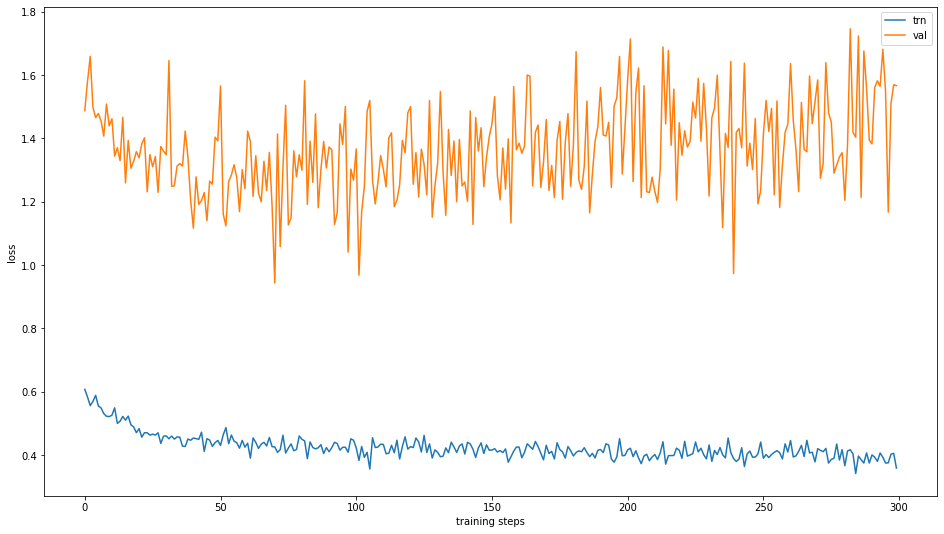

In [603]:
plt.figure(figsize=(16,9))
x_range = range(len(trn_loss_list))
plt.plot(x_range, trn_loss_list, label="trn")
plt.plot(x_range, val_loss_list, label="val")
plt.legend()
plt.xlabel("training steps")
plt.ylabel("loss")

## Transfer Learning

## Train model

In [77]:
model = MLPRegressor()

NameError: name 'X_features' is not defined

In [78]:
criterion = nn.MSELoss()
learning_rate = 1e-3
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

NameError: name 'model' is not defined

In [44]:
batch_size = 32

In [45]:
trn = data_utils.TensorDataset(trn_X, trn_y)
trn_loader = data_utils.DataLoader(trn, batch_size=batch_size, shuffle=True)

val = data_utils.TensorDataset(val_X, val_y)
val_loader = data_utils.DataLoader(val, batch_size=batch_size, shuffle=False)

NameError: name 'val_X' is not defined

In [13]:
trn_X_pd = df2_mod.iloc[:,2:]

In [14]:
trn_X_pd

ID,ENSG00000069482,ENSG00000072657,ENSG00000078399,ENSG00000080572,ENSG00000100678,ENSG00000104435,ENSG00000104888,ENSG00000105146,ENSG00000109321,ENSG00000112499,...,ENSG00000274576,ENSG00000275756,ENSG00000276775,ENSG00000277247,ENSG00000278196,ENSG00000278698,ENSG00000279834,ENSG00000279970,ENSG00000280411,ENSG00000281880
TCGA-61-1910,0.970585,0.003561,0.044476,0.000000,0.000000,0.000000,0.043732,2.308592,1.014494,0.000000,...,0.000000,0.920597,0.000000,1.604301,0.299376,0.000000,0.894232,1.612154,0.761720,0.000000
TCGA-24-0982,0.395276,0.005010,0.090384,0.007062,0.000000,0.006438,0.082034,0.242661,0.691196,0.004156,...,24.797152,0.259035,4.625172,0.188089,4.211878,0.270091,0.034947,0.311310,0.357217,0.000000
TCGA-36-1580,1.403594,0.008641,0.133845,0.001970,0.002559,0.041762,0.074384,0.984290,2.329158,0.001391,...,4.017149,0.289083,0.893372,0.314861,4.817979,0.000000,0.000000,0.707253,15.996040,0.000000
TCGA-25-1321,0.308600,0.003129,0.004478,0.162223,0.000788,0.000000,0.101272,0.240456,1.740308,0.004819,...,2.576079,0.166843,0.000000,0.121147,1.356422,0.521892,0.157563,2.033770,1.495528,0.000000
TCGA-30-1892,0.206074,0.133216,0.119614,0.056072,0.000000,0.055381,0.280458,0.592872,0.914734,0.004400,...,1.058604,0.114269,2.825069,0.000000,3.716018,0.000000,0.000000,0.294278,1.890974,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-04-1347,0.319288,0.000491,0.033696,0.005704,0.000988,0.011701,0.060742,0.663423,0.094262,0.000671,...,0.000000,0.000000,0.000000,3.038608,0.567030,0.000000,0.000000,0.071847,4.616723,0.000000
TCGA-24-0968,0.237050,0.009708,0.185222,0.000000,0.000000,0.000000,0.307004,0.213121,1.291373,0.003796,...,15.221570,0.525782,4.332951,2.720169,31.845646,0.205584,0.000000,0.710875,6.117782,0.000000
TCGA-30-1891,0.772034,0.000481,0.110194,0.000000,0.000646,0.200678,0.000000,0.098616,2.959271,0.077290,...,47.331214,0.000000,2.631492,0.000000,65.568652,0.000000,0.000000,0.000000,80.395413,0.000000
TCGA-09-0366,0.195435,0.000085,1.631170,0.026487,0.001376,0.006339,0.303848,0.703636,5.424154,0.008418,...,0.225023,0.534375,0.100086,1.481522,3.712525,0.000000,0.058985,2.477118,0.602935,0.001573


In [15]:
trn_y_pd = df2_mod.iloc[:,1]

In [16]:
trn_y_pd

TCGA-61-1910    0.007666
TCGA-24-0982    0.007190
TCGA-36-1580    0.027081
TCGA-25-1321    0.002315
TCGA-30-1892    0.057091
                  ...   
TCGA-04-1347    0.000000
TCGA-24-0968    0.013682
TCGA-30-1891    0.034186
TCGA-09-0366    0.032361
TCGA-13-0884    0.018597
Name: ENSG00000048545, Length: 214, dtype: float64

In [17]:
trn_X = torch.from_numpy(trn_X_pd.astype(float).values)
trn_y = torch.from_numpy(trn_y_pd.astype(float).values)

In [18]:
batch_size=64

In [19]:
trn = data_utils.TensorDataset(trn_X, trn_y)
trn_loader = data_utils.DataLoader(trn, batch_size=batch_size, shuffle=True)

In [20]:
tmp = next(iter(trn_loader))

In [21]:
# for dictionary batch
class Dataset(data_utils.Dataset):
   
    def __init__(self, X, y):
        self.X = X
        self.y = y
   
    def __getitem__(self, idx):
        return {'X': self.X[idx], 'y': self.y[idx]}
   
    def __len__(self):
        return len(self.X)

In [22]:
trn = Dataset(trn_X, trn_y)
trn_loader = data_utils.DataLoader(trn, batch_size=batch_size, shuffle=True)